# TELCO CUSTUMER CHURN

https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

Análise exploratória de dados do dataset disponível no Kaggle e treino de modelos preditivos de ML.

Aproveitado projeto de estudo realizado anteriormente para encaixe de melhorias que observei posteriormente a primeira postagem do projeto, onde identifiquei a possibilidade de utilização de outros algoritmos para teste, balanceamento dos dados e treino de normalização e padronização dos dados.

In [1]:
#importanto as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# verificando valores de churn
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [6]:
# % dos valores de churn e não churn
churn = df['Churn'].value_counts(normalize = True)
print("Porcentagens de não churn e churn:")
for status, perc in churn.items():
    print(f"{status}: {perc * 100:.2f}%")

Porcentagens de não churn e churn:
No: 73.46%
Yes: 26.54%


In [7]:
# procurando valores NAN e nulos
df.isna().value_counts()

,,,,,,,,,,,,,,,,,,,,,count
customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7043


In [8]:
df.isnull().value_counts()

,,,,,,,,,,,,,,,,,,,,,count
customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7043


In [9]:
#as cobranças totais está como objeto no df
#precisamos passar para valores numéricos para analisar
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
media_totalcharges = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(media_totalcharges)

df.isnull().value_counts()

,,,,,,,,,,,,,,,,,,,,,count
customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7043


In [11]:
# verificando análise descritiva numérica das cobranças mensais
df['MonthlyCharges'].describe().round(2)

,MonthlyCharges
count,7043.00
mean,64.76
std,30.09
min,18.25
25%,35.50
50%,70.35
75%,89.85
max,118.75


In [12]:
# verificando análise descritiva numérica das cobranças totais
df['TotalCharges'].describe().round(2)

,TotalCharges
count,7043.00
mean,2283.30
std,2265.00
min,18.80
25%,402.22
50%,1400.55
75%,3786.60
max,8684.80


In [13]:
# notei que em senioridade estamos com 0 ou 1 no lugar de Yes ou No, farei a alteração
df['SeniorCitizen'].unique()

array([0, 1])

In [14]:
# ajustando a senioridade para a categórica booleana "Yes" ou "No"
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

# **Visualização das variáveis categóricas:**

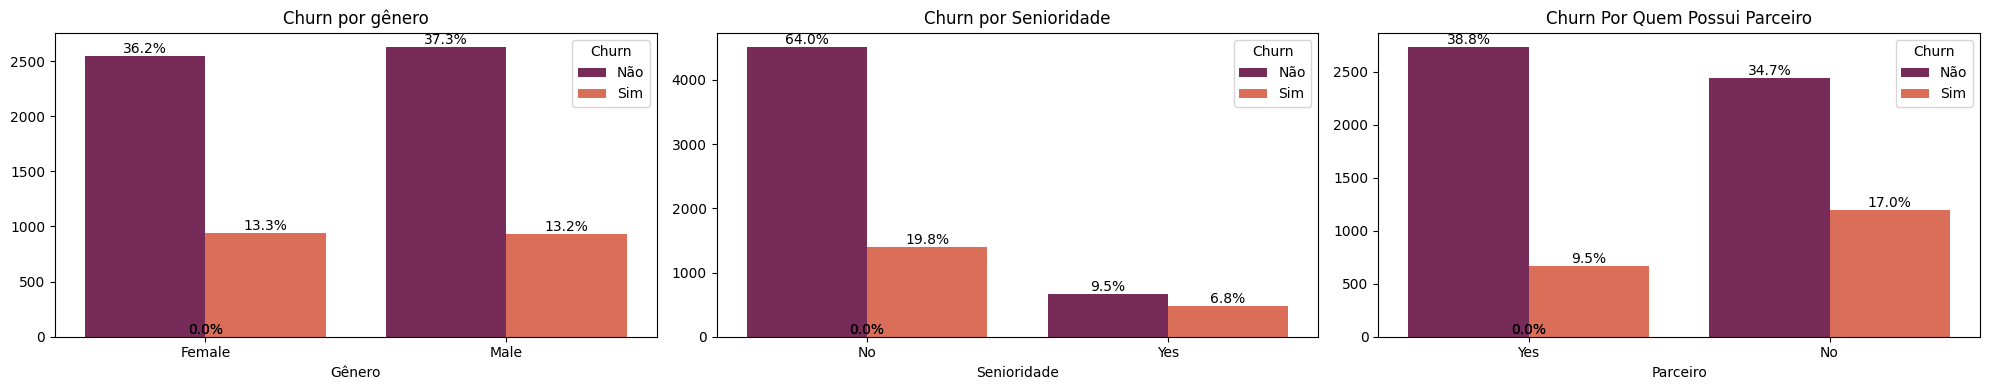

In [15]:
#acrescentando %s
def add_percentage (ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va ='bottom')

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes = axes.flatten()

plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df, x='gender', hue = 'Churn', palette ='rocket')
plt.title('Churn por gênero')
plt.ylabel('')
plt.xlabel('Gênero')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax1, len(df['gender']))

plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df, x='SeniorCitizen', hue = 'Churn', palette ='rocket')
plt.title('Churn por Senioridade')
plt.ylabel('')
plt.xlabel('Senioridade')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax2, len(df['SeniorCitizen']))

plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df, x='Partner', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Parceiro')
plt.ylabel('')
plt.xlabel('Parceiro')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax3, len(df['Partner']))

plt.tight_layout()
plt.show()


- Mulheres possuem uma tendência ligeiramente maior ao churn.
- Jovens tendem ao churn mais do que pessoas mais velhas.
- Pessoas sem parceiros tendem a deixar a empresa com maior frequência do que as que possuem parceiros (não especificado se casados ou não).

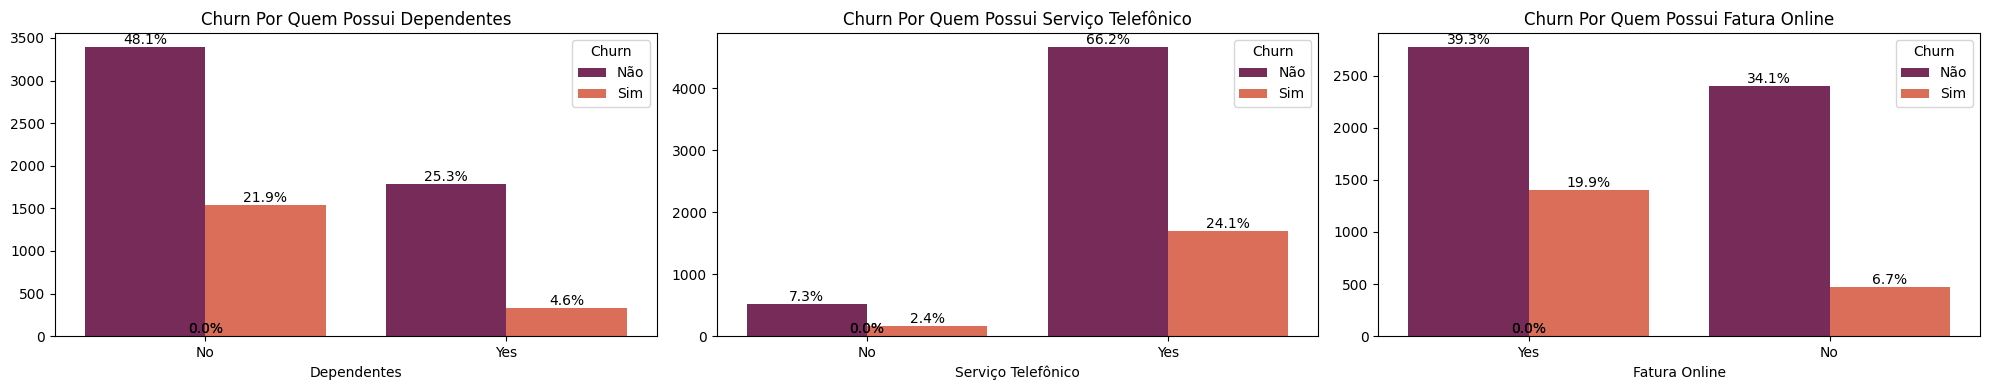

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes = axes.flatten()

plt.subplot(1, 3, 1)
ax4 = sns.countplot(data=df, x='Dependents', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Dependentes')
plt.ylabel('')
plt.xlabel('Dependentes')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax4, len(df['Dependents']))

plt.subplot(1, 3, 2)
ax5 = sns.countplot(data=df, x='PhoneService', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Serviço Telefônico')
plt.ylabel('')
plt.xlabel('Serviço Telefônico')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax5, len(df['PhoneService']))

plt.subplot(1, 3, 3)
ax6 = sns.countplot(data=df, x='PaperlessBilling', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Fatura Online')
plt.ylabel('')
plt.xlabel('Fatura Online')
handles, labels = ax6.get_legend_handles_labels()
ax6.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax6, len(df['PaperlessBilling']))

plt.tight_layout()
plt.show()

- Pessoas sem dependentes tendem ao churn com mais frequência.
- Pessoas que optam pelo serviço telefônico tendem mais ao churn (Vale analisar a qualidade do serviço e feedback de usuários).
- Clientes que pagam por fatura online tendem a realizar mais churn (Vale analisar se a empresa possui dificuldades no envio das faturas e processamento dos pagamentos das faturas online).

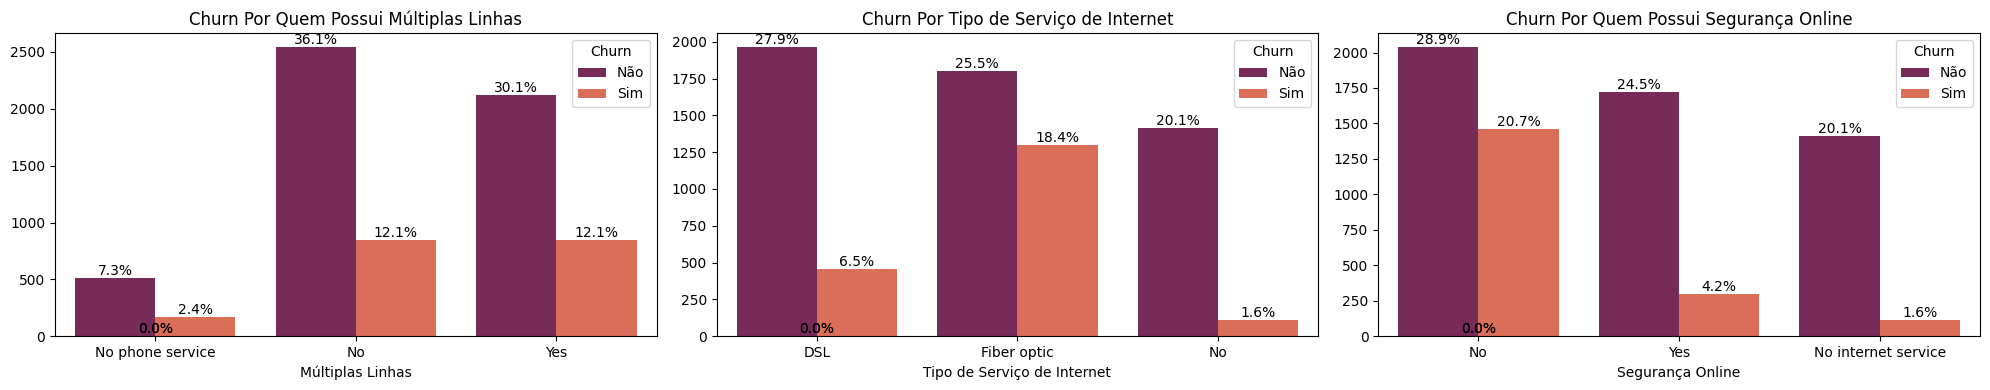

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes = axes.flatten()

plt.subplot(1, 3, 1)
ax7 = sns.countplot(data=df, x='MultipleLines', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Múltiplas Linhas')
plt.ylabel('')
plt.xlabel('Múltiplas Linhas')
handles, labels = ax7.get_legend_handles_labels()
ax7.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax7, len(df['MultipleLines']))

plt.subplot(1, 3, 2)
ax8 = sns.countplot(data=df, x='InternetService', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Tipo de Serviço de Internet')
plt.ylabel('')
plt.xlabel('Tipo de Serviço de Internet')
handles, labels = ax8.get_legend_handles_labels()
ax8.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax8, len(df['InternetService']))

plt.subplot(1, 3, 3)
ax9 = sns.countplot(data=df, x='OnlineSecurity', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Segurança Online')
plt.ylabel('')
plt.xlabel('Segurança Online')
handles, labels = ax9.get_legend_handles_labels()
ax9.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax9, len(df['OnlineSecurity']))

plt.tight_layout()
plt.show()

- Por múltiplas linhas o churn é o mesmo de quem não possui mais de uma linha com a empresa.
- O churn de clientes que pagam pelo serviço de internet com fibra óptica é muito maior que os demais (Vale analisar a qualidade do produto utilizado na instalação).
- A taxa também é maior por quem não compra um serviço de segurança online.

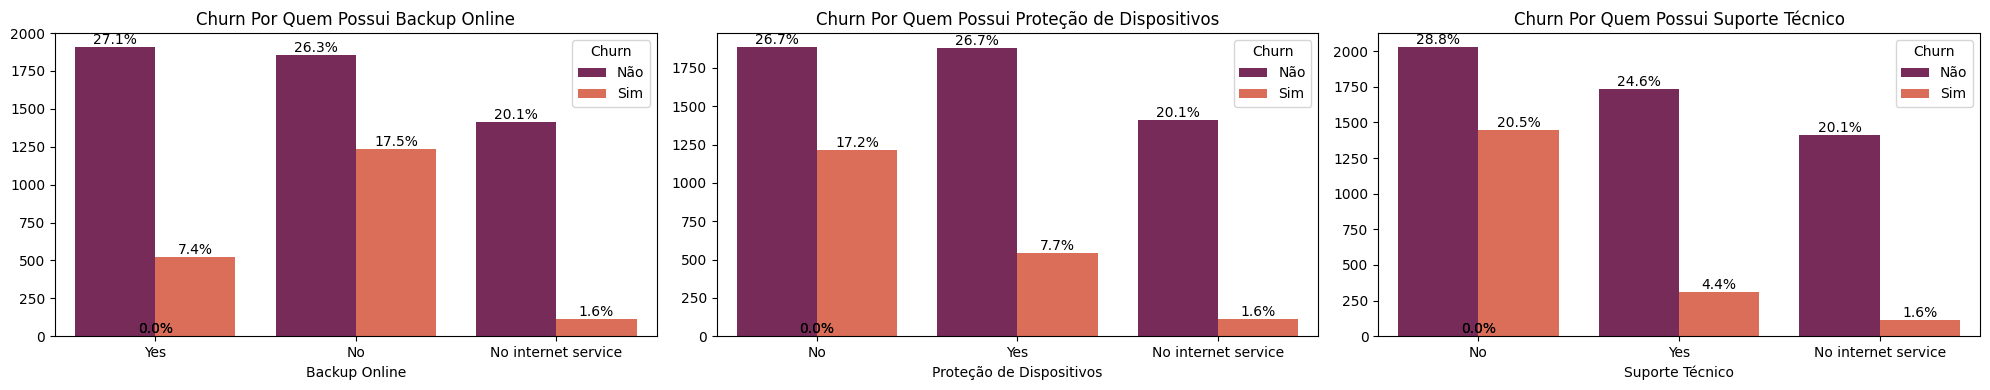

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes = axes.flatten()

plt.subplot(1, 3, 1)
ax10 = sns.countplot(data=df, x='OnlineBackup', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Backup Online')
plt.ylabel('')
plt.xlabel('Backup Online')
handles, labels = ax10.get_legend_handles_labels()
ax10.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax10, len(df['OnlineBackup']))

plt.subplot(1, 3, 2)
ax11 = sns.countplot(data=df, x='DeviceProtection', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Proteção de Dispositivos')
plt.ylabel('')
plt.xlabel('Proteção de Dispositivos')
handles, labels = ax11.get_legend_handles_labels()
ax11.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax11, len(df['DeviceProtection']))

plt.subplot(1, 3, 3)
ax12 = sns.countplot(data=df, x='TechSupport', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Suporte Técnico')
plt.ylabel('')
plt.xlabel('Suporte Técnico')
handles, labels = ax12.get_legend_handles_labels()
ax12.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax12, len(df['TechSupport']))

plt.tight_layout()
plt.show()

- Temos uma maior taxa de churn por quem não opta pelo backup online oferecido pela empresa, assim como por quem não possui o serviço de proteção de dispositivos e não possui suporte técnico.

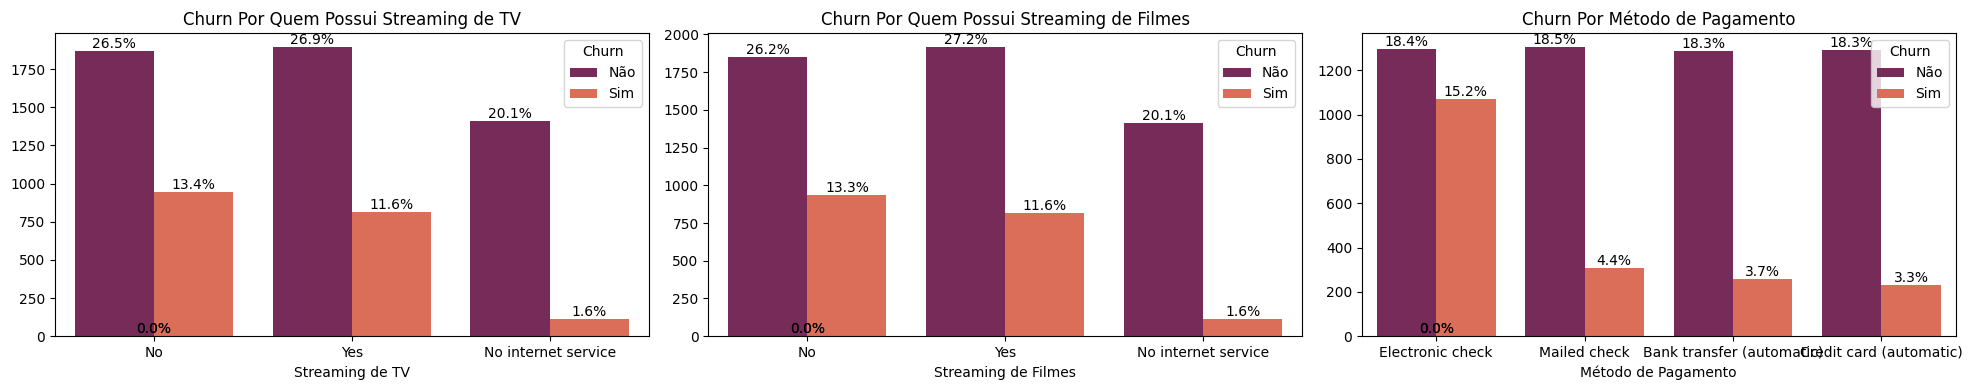

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes = axes.flatten()

plt.subplot(1, 3, 1)
ax13 = sns.countplot(data=df, x='StreamingTV', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Streaming de TV')
plt.ylabel('')
plt.xlabel('Streaming de TV')
handles, labels = ax13.get_legend_handles_labels()
ax13.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax13, len(df['StreamingTV']))

plt.subplot(1, 3, 2)
ax14 = sns.countplot(data=df, x='StreamingMovies', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Quem Possui Streaming de Filmes')
plt.ylabel('')
plt.xlabel('Streaming de Filmes')
handles, labels = ax14.get_legend_handles_labels()
ax14.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax14, len(df['StreamingMovies']))

plt.subplot(1, 3, 3)
ax15 = sns.countplot(data=df, x='PaymentMethod', hue = 'Churn', palette ='rocket')
plt.title('Churn Por Método de Pagamento')
plt.ylabel('')
plt.xlabel('Método de Pagamento')
handles, labels = ax15.get_legend_handles_labels()
ax15.legend(handles, ['Não', 'Sim'], title="Churn")
add_percentage(ax15, len(df['PaymentMethod']))

plt.tight_layout()
plt.show()

- Os clientes que não possuem os serviços de streaming, possuem maiores taxas de churn.
- Mais uma vez, vemos que o churn acontece com processamento de pagamentos de maneira eletrônica, onde temos a maior frequência quando comparado com os demais métodos de pagamento.

**Considerações**

Em um geral, a empresa precisa se atentar a qualidade dos serviços de instalação de fibra óptica, assim como seus processamentos de pagamento e envio de faturas eletronicamente. Realizar mais campanhas de seus demais serviços afim de trazer mais clientes fiéis para a empresa, visto que quem possui a maior parte dos serviços oferecidos, tendem a não realizar churn.

# **Análises gráficas das variáveis contínuas**

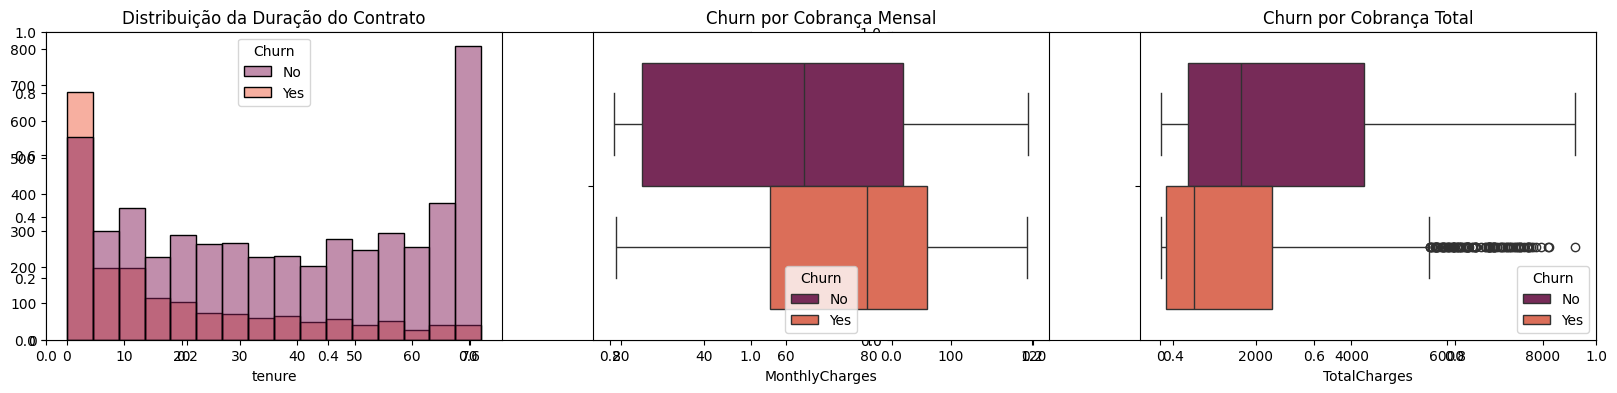

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
axes = axes.flatten()

plt.subplot(1, 3, 1)
ax16 = sns.histplot(data=df, x='tenure', hue = 'Churn', palette ='rocket')
plt.title('Distribuição da Duração do Contrato')
plt.ylabel('')

plt.subplot(1, 3, 2)
ax17 = sns.boxplot(data=df, x='MonthlyCharges', hue = 'Churn', palette ='rocket')
plt.title('Churn por Cobrança Mensal')
plt.ylabel('')

plt.subplot(1, 3, 3)
ax18 = sns.boxplot(data=df, x='TotalCharges', hue = 'Churn', palette ='rocket')
plt.title('Churn por Cobrança Total')
plt.ylabel('')
plt.show()

plt.tight_layout()
plt.show()

- Quanto maior a duração do contrato, menor a taxa de churn.
- Clientes que pagam a média da cobrança mensal em torno de $64,00 tendem a permanecer clientes.

# **Ajustando o modelo preditivo**

In [21]:
#retiraremos a coluna que não vamos precisar (custumerID) e criaremos um novo df
new_df = df.drop(columns=['customerID'])
new_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
gender = new_df['gender'].unique()
print(gender)
gender_count = new_df['gender'].value_counts()
print(gender_count)

['Female' 'Male']
gender
Male      3555
Female    3488
Name: count, dtype: int64


In [23]:
#usaremos o LabelEncoder para transformação dos vaores booleanos para 0 e 1 (No e Yes respectivamente)
label_encoder_gender = LabelEncoder()
new_df['gender'] = label_encoder_gender.fit_transform(new_df['gender'])
gender = new_df['gender'].unique()
print(gender)
gender_count = new_df['gender'].value_counts()
print(gender_count)

[0 1]
gender
1    3555
0    3488
Name: count, dtype: int64


Ficamos então com:
*   Homens: 1
*   Mulheres: 0

In [24]:
# o mesmo vai acontecer com a variável Contract
contract = new_df['Contract'].unique()
print(contract)
contract_count = new_df['Contract'].value_counts()
print(contract_count)

['Month-to-month' 'One year' 'Two year']
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [25]:
label_encoder_contract = LabelEncoder()
new_df['Contract'] = label_encoder_contract.fit_transform(new_df['Contract'])
contract = new_df['Contract'].unique()
print(contract)
contract_count = new_df['Contract'].value_counts()
print(contract_count)

[0 1 2]
Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64


Ficamos então com:
*   Month to Month: 0
*   Two Year: 2
*   One Year: 1

In [26]:
# seguiremos com o LabelEncoder para as demais variáveis
label_encoder_senior = LabelEncoder()
new_df['SeniorCitizen'] = label_encoder_senior.fit_transform(new_df['SeniorCitizen'])

label_encoder_partner = LabelEncoder()
new_df['Partner'] = label_encoder_partner.fit_transform(new_df['Partner'])

label_encoder_dependents = LabelEncoder()
new_df['Dependents'] = label_encoder_dependents.fit_transform(new_df['Dependents'])

label_encoder_phone = LabelEncoder()
new_df['PhoneService'] = label_encoder_phone.fit_transform(new_df['PhoneService'])

label_encoder_lines = LabelEncoder()
new_df['MultipleLines'] = label_encoder_lines.fit_transform(new_df['MultipleLines'])

label_encoder_internet = LabelEncoder()
new_df['InternetService'] = label_encoder_internet.fit_transform(new_df['InternetService'])

label_encoder_security = LabelEncoder()
new_df['OnlineSecurity'] = label_encoder_security.fit_transform(new_df['OnlineSecurity'])

label_encoder_backup = LabelEncoder()
new_df['OnlineBackup'] = label_encoder_backup.fit_transform(new_df['OnlineBackup'])

label_encoder_protection = LabelEncoder()
new_df['DeviceProtection'] = label_encoder_protection.fit_transform(new_df['DeviceProtection'])

label_encoder_support = LabelEncoder()
new_df['TechSupport'] = label_encoder_support.fit_transform(new_df['TechSupport'])

label_encoder_streaming = LabelEncoder()
new_df['StreamingTV'] = label_encoder_streaming.fit_transform(new_df['StreamingTV'])

label_encoder_movies = LabelEncoder()
new_df['StreamingMovies'] = label_encoder_movies.fit_transform(new_df['StreamingMovies'])

label_encoder_paper = LabelEncoder()
new_df['PaperlessBilling'] = label_encoder_paper.fit_transform(new_df['PaperlessBilling'])

label_encoder_payment = LabelEncoder()
new_df['PaymentMethod'] = label_encoder_payment.fit_transform(new_df['PaymentMethod'])

label_encoder_churn = LabelEncoder()
new_df['Churn'] = label_encoder_churn.fit_transform(new_df['Churn'])


In [27]:
#balanceando os dados, pois sabemos que temos maior números de não churn do que sim
#utilizaremos todas as variáveis preditoras com exceção do nosso target (Churn)

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [29]:
#Separar variaveis preditoras e target
pred = new_df.iloc[:, 0:19]
target = new_df.iloc[:, 19]

In [30]:
pred.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


In [31]:
target.head(2)

,Churn
0,0
1,0


In [32]:
# Cria o balanceador SMOTE
seed = 100
balanc = SMOTE(random_state = seed)
pred_res, target_res = balanc.fit_resample(pred, target)

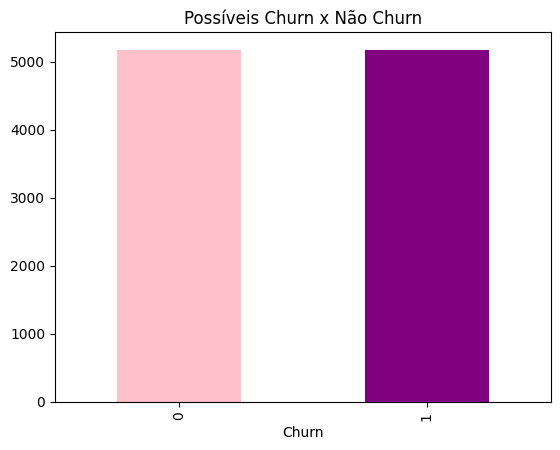

In [33]:
# Visualizando o balanceamento da variável target
target_res.value_counts().plot(kind='bar',
                               title='Possíveis Churn x Não Churn',color = ['pink','purple']);

In [34]:
pred.shape #antes do balanceamento

(7043, 19)

In [35]:
target.shape #antes do balanceamento

(7043,)

In [36]:
pred_res.shape #depois do balanceamento

(10348, 19)

In [37]:
target_res.shape #depois do balanceamento

(10348,)

In [38]:
#normalização do modelo - deixando todas as variáveis na mesma escala
norm = MinMaxScaler().fit(pred_res)
df_norm = norm.transform(pred_res)
df_norm

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.01352509,
        0.00474248],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.26338244,
        0.02886172],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.84577766,
        0.64807834]])

In [39]:
# criando o df normalizado
df_norm = pd.DataFrame(df_norm, columns=pred_res.columns)
df_norm.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


In [40]:
# visualizando as medidas dos dados normalizados
df_norm.describe().round(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.0,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00
mean,0.43,0.13,0.38,0.22,0.38,0.89,0.45,0.42,0.3,0.38,0.38,0.31,0.46,0.46,0.24,0.60,0.52,0.49,0.23
std,0.50,0.34,0.48,0.41,0.33,0.31,0.46,0.34,0.4,0.43,0.43,0.40,0.44,0.44,0.38,0.49,0.33,0.29,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.07,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.27,0.03
50%,0.00,0.00,0.00,0.00,0.29,1.00,0.50,0.50,0.0,0.00,0.00,0.00,0.50,0.50,0.00,1.00,0.67,0.56,0.13
75%,1.00,0.00,1.00,0.00,0.67,1.00,1.00,0.50,0.5,1.00,1.00,0.50,1.00,1.00,0.50,1.00,0.67,0.72,0.37
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [41]:
#padronização do modelo - deixando todas as variáveis na mesma escala
padr = StandardScaler().fit(pred_res)
df_padr = padr.transform(pred_res)
df_padr

array([[-0.87067215, -0.39129143,  1.2850268 , ...,  0.44001422,
        -1.32037351, -0.92295636],
       [ 1.14853794, -0.39129143, -0.77819389, ...,  1.4438209 ,
        -0.37621682, -0.06879696],
       [ 1.14853794, -0.39129143, -0.77819389, ...,  1.4438209 ,
        -0.48421998, -0.88699224],
       ...,
       [-0.87067215, -0.39129143, -0.77819389, ...,  1.4438209 ,
        -1.67715771, -0.90915479],
       [ 1.14853794, -0.39129143, -0.77819389, ..., -0.56379247,
        -0.80230896, -0.81315066],
       [ 1.14853794, -0.39129143, -0.77819389, ..., -0.56379247,
         1.2368855 ,  1.65157732]])

In [42]:
# criando o df padronizado
df_padr = pd.DataFrame(df_padr, columns=pred_res.columns)
df_padr.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.870672,-0.391291,1.285027,-0.526662,-1.110637,-2.893646,0.101289,-1.228964,-0.75625,1.458494,-0.893859,-0.771519,-1.030102,-1.033644,-0.639202,0.822394,0.440014,-1.320374,-0.922956
1,1.148538,-0.391291,-0.778194,-0.526662,0.269050,0.345585,-0.975936,-1.228964,1.72809,-0.885607,1.444865,-0.771519,-1.030102,-1.033644,0.673712,-1.215962,1.443821,-0.376217,-0.068797
2,1.148538,-0.391291,-0.778194,-0.526662,-1.068829,0.345585,-0.975936,-1.228964,1.72809,1.458494,-0.893859,-0.771519,-1.030102,-1.033644,-0.639202,0.822394,1.443821,-0.484220,-0.886992
3,1.148538,-0.391291,-0.778194,-0.526662,0.728945,-2.893646,0.101289,-1.228964,1.72809,-0.885607,1.444865,1.697914,-1.030102,-1.033644,0.673712,-1.215962,-1.567599,-0.886619,-0.091188
4,-0.870672,-0.391291,-0.778194,-0.526662,-1.068829,0.345585,-0.975936,0.241246,-0.75625,-0.885607,-0.893859,-0.771519,-1.030102,-1.033644,-0.639202,0.822394,0.440014,0.102829,-0.867012


In [43]:
# visualizando as medidas dos dados padronizados
df_padr.describe().round(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00,10348.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.87,-0.39,-0.78,-0.53,-1.15,-2.89,-0.98,-1.23,-0.76,-0.89,-0.89,-0.77,-1.03,-1.03,-0.64,-1.22,-1.57,-1.72,-0.93
25%,-0.87,-0.39,-0.78,-0.53,-0.94,0.35,-0.98,-1.23,-0.76,-0.89,-0.89,-0.77,-1.03,-1.03,-0.64,-1.22,-0.56,-0.78,-0.81
50%,-0.87,-0.39,-0.78,-0.53,-0.27,0.35,0.10,0.24,-0.76,-0.89,-0.89,-0.77,0.10,0.10,-0.64,0.82,0.44,0.24,-0.40
75%,1.15,-0.39,1.29,-0.53,0.85,0.35,1.18,0.24,0.49,1.46,1.44,0.46,1.22,1.23,0.67,0.82,0.44,0.80,0.55
max,1.15,2.56,1.29,1.90,1.86,0.35,1.18,1.71,1.73,1.46,1.44,1.70,1.22,1.23,1.99,0.82,1.44,1.78,3.05


# **Iniciando o  modelo.**

Trabalharemos com três algoritmos de Machine Learning afim de identificar a melhor acurácia.
Os algoritmos são:
- Logistic Regression: Regressão Logística
- RandomForest: Árvores de decisão.
- XGBoost: Árvores de decisão que tentam corrigir os erros das anteriores.

In [48]:
#modelo com os dados NORMALIZADOS
#separando as variáveis
X = df_norm
y = target_res

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42,
                             use_label_encoder=False, eval_metric='logloss'),
    'SVM': svm.SVC(kernel = 'linear'),
    'KNN': KNeighborsClassifier()}

#treinando e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    results = model.predict(X_test)
    print(f"Resultados para {name}:")
    print(f"Acurácia: {round(accuracy_score(y_test, results) * 100, 2)}%")

Resultados para Logistic Regression:
Acurácia: 81.06%
Resultados para Random Forest:
Acurácia: 84.48%
Resultados para XGBoost:
Acurácia: 84.48%
Resultados para SVM:
Acurácia: 81.0%
Resultados para KNN:
Acurácia: 78.07%


In [47]:
#modelo com os dados PADRONIZADOS
#separando as variáveis
X = df_padr
y = target_res

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42,
                             use_label_encoder=False, eval_metric='logloss'),
    'SVM': svm.SVC(kernel = 'linear'),
    'KNN': KNeighborsClassifier()}

#treinando e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    results = model.predict(X_test)
    print(f"Resultados para {name}:")
    print(f"Acurácia: {round(accuracy_score(y_test, results) * 100, 2)}%")

Resultados para Logistic Regression:
Acurácia: 80.87%
Resultados para Random Forest:
Acurácia: 84.57%
Resultados para XGBoost:
Acurácia: 84.48%
Resultados para SVM:
Acurácia: 81.06%
Resultados para KNN:
Acurácia: 79.19%


O modelo Random Forest obteve a maior acurácia nos dados padronizados, com 84,57% de acurácia.